# Preparação de Dados

In [1]:
# importações

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_8569/3602734154.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_exames = pd.read_csv('./datasets/diabetes.csv')
df_exames.info(), df_exames.head(11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


(None,
     id_paciente genero  idade  peso  altura  resultado
 0             1      M     46    83     165         98
 1             2      F     23    83     164         82
 2             3      M     39    71     154         93
 3             4      F     26   103     165         95
 4             5      M     27    55     176        100
 5             6      M     64    93     190        117
 6             7      F     21    70     182         90
 7             8      F     60   101     179         84
 8             9      F     63    83     189         92
 9            10      F     65    78     175        121
 10           11      M     60   120     158         98)

In [3]:
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [4]:
# remover coluna id_paciente
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [5]:
df_exames

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100
...,...,...,...,...,...
95,F,52,96,183,89
96,F,68,108,169,105
97,M,21,95,154,125
98,M,41,109,173,128


In [6]:
# converter uma variavel categorica (genero) em numerica, usando ONE-HOT-ENCODING

df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')
df_exames

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
...,...,...,...,...,...,...
95,52,96,183,89,1,0
96,68,108,169,105,1,0
97,21,95,154,125,0,1
98,41,109,173,128,0,1


<Axes: >

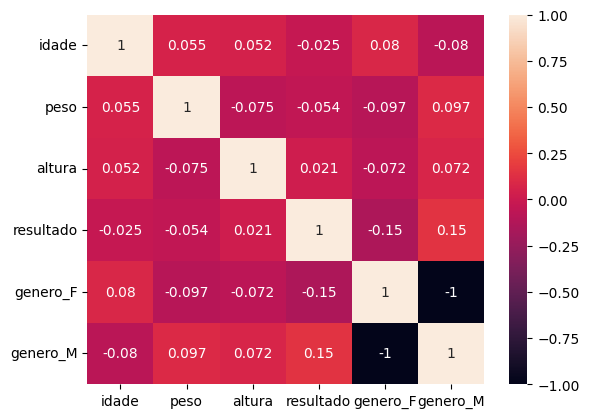

In [7]:
# apresentar mapa de calor com correlação entre as variaveis
sns.heatmap(df_exames.corr(), vmin=-1, vmax=1 ,annot=True)

<Axes: >

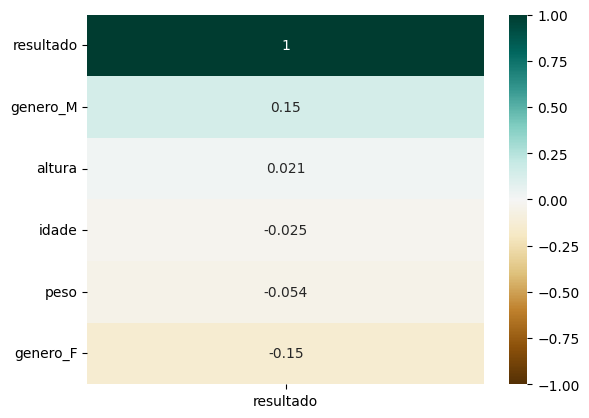

In [8]:
# mapa de correlação mas só com a variavel TARGET (resultado)

sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


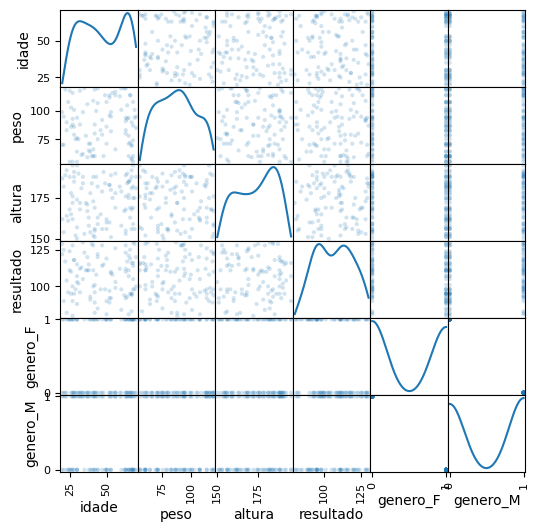

In [9]:
# plot ed sscatter (dispersão) com distribuição
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>, <Axes: >, <Axes: >]],
      dtype=object)

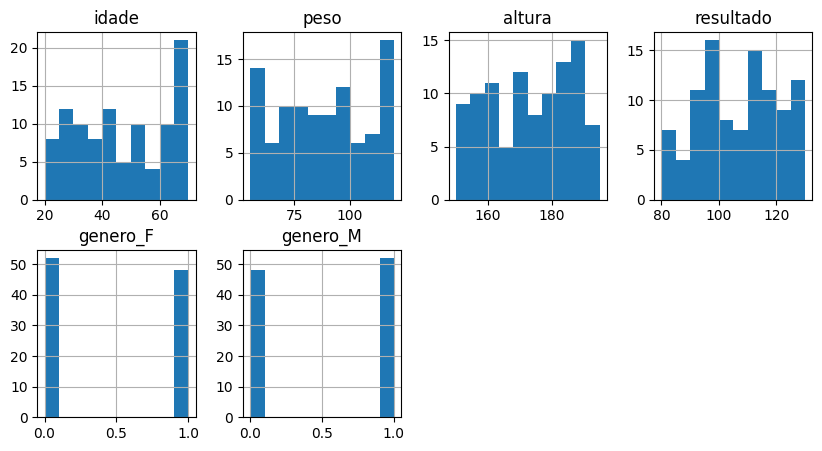

In [10]:
# histograma de todas as variaveis
df_exames.hist(layout=(2,4), figsize=(10,5))

In [11]:
# Criar um feature nova
# IMC (peso (kg) / altura² (m))

df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura']/100) **2))

In [12]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      100 non-null    int64  
 1   peso       100 non-null    int64  
 2   altura     100 non-null    int64  
 3   resultado  100 non-null    int64  
 4   genero_F   100 non-null    int64  
 5   genero_M   100 non-null    int64  
 6   imc        100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


# Treinamento de Dados

### Exemplo Simples

In [13]:
dict_regressao = {'tempo_casa': [1,3,6,9,10,14,18], 'salario': [1500,3000,4500, 6000, 7000,8500,10000]}
df_regressao =pd.DataFrame.from_dict(dict_regressao)

<Axes: xlabel='tempo_casa', ylabel='salario'>

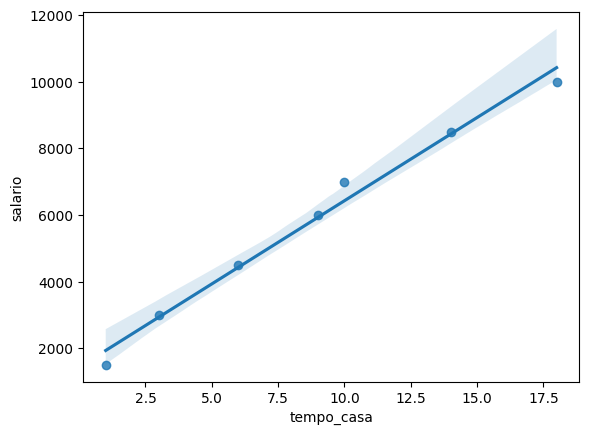

In [14]:
# plot de tipo de regress

sns.regplot(data=df_regressao, x='tempo_casa', y='salario')

# Modelo Pensado

In [15]:
# importações sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Treinar o Modelo

In [16]:
# modelo 1 - sem IMC
X = df_exames.drop(columns=['imc', 'resultado'])
y = df_exames['resultado']

In [17]:
# dividir conjunto entre Treino e Teste
# random state faz com que se eu rodar novamente o codigo, ele continua com os mesmos splits
X_train, X_teste, y_train, y_teste = train_test_split(X, y, train_size=0.7, random_state=51)

In [18]:
# Treinar o algoritmo e Regressão Linear - Modelo 1
model_1 = LinearRegression().fit(X_train, y_train)

In [19]:
# Gerar Predições do Conjunto Teste com base no Modelo 1

y_pred = model_1.predict(X_teste)
y_pred

array([ 99.6684178 , 111.15467732, 113.11211654, 108.92788908,
       106.38206401, 107.30939688, 109.65461594, 112.00335574,
       111.06900447, 109.78672617, 112.35808062, 112.28232464,
       111.9380202 , 108.10634945,  98.35810505, 108.24066307,
       107.47444699, 107.86866238, 108.45528721, 106.47405474,
       108.68462818, 107.39800684, 105.52920918, 101.5310878 ,
       107.73027652, 103.02436766, 105.65307386, 112.03833836,
       105.49217347, 100.44933075])

In [20]:
# equação da reda y = ax + b
#    a        ,          b
model_1.coef_, model_1.intercept_

(array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112]),
 94.21133142019856)

In [21]:
# metricas - R2 SCORE
print(model_1.score(X_train, y_train)) # no de treinamento
print(model_1.score(X_teste, y_teste)) # no de teste

r2_score(y_teste, y_pred)

0.06218388634297234
-0.1364090447910642


-0.1364090447910642

In [22]:
# metricas - MEAN (MEAN ABSOLUTE ERROR)
mean_absolute_error(y_teste, y_pred)

12.695569181179541

In [23]:
# modelo 2 - apenas IMC

X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

X_train, X_teste, y_train, y_teste = train_test_split(X, y, train_size=0.7, random_state=51)

In [24]:
model_2 = LinearRegression().fit(X_train, y_train)

y_pred = model_2.predict(X_teste)
y_pred

array([102.73796795, 107.63459815, 108.58489716, 105.70201829,
       103.49767627, 108.73954738, 106.19637687, 108.30118863,
       107.77627304, 106.26623629, 108.10220438, 108.18040704,
       107.64653815, 104.90037915, 101.0377542 , 105.66044363,
       104.93184853, 109.01470939, 105.54141413, 103.46672578,
       105.42716889, 108.77686903, 107.65316149, 104.46837648,
       105.02409479, 105.70201829, 102.84895739, 108.11389027,
       107.77143433, 103.72326007])

In [28]:
model_2.coef_, model_2.intercept_

(array([-0.21677589]), 112.15019229088836)

In [26]:
# metricas - R2 SCORE
print(model_2.score(X_train, y_train)) # no de treinamento
print(model_2.score(X_teste, y_teste)) # no de teste

r2_score(y_teste, y_pred)

0.015285962664806862
-0.0889832856240178


-0.0889832856240178

In [27]:
mean_absolute_error(y_teste, y_pred)

12.505651407060103

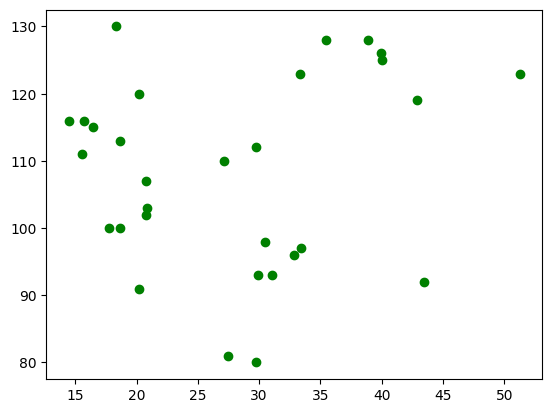

In [29]:
# mostrar foi calculada - sem reta

plt.scatter(X_teste, y_teste, color='g')

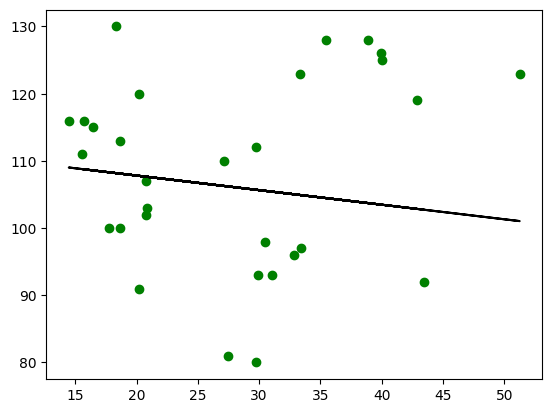

In [31]:
# mostrar foi calculada - com reta

plt.scatter(X_teste, y_teste, color='g')
plt.plot(X_teste, y_pred, color='k')